# Basic Assessment


## Exploratory Data Analysis(EDA)

- Perform basic EDA to uncover the trends, correlations, and patterns.
- Generate visualizations for temperature and precipitation.



#### Importing Necessary Libraries

In [1]:
# This command will make Python code more structured
%load_ext nb_black

# Make warnings not displayed
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore",ConvergenceWarning)

# Libraries for reading and manipulating data
import pandas as pd
import numpy as np

# Libraries for splitting data
from sklearn.model_selection import train_test_split

# Libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

# Set limits on number of displayed columns and rows
pd.set_option("display.max_columns",None) # no maximum limit
pd.set_option("display.max_rows",200) # maximum of 200 rows

<IPython.core.display.Javascript object>

## Loading the data

In [2]:
filepath = "/Users/arunekambaram/Desktop/PM Accelarator/GlobalWeatherRepository.csv"

# Read data and create a data frame
df = pd.read_csv(filepath, skiprows=0)

# Create a copy of original data frame for further steps
df_0 = df.copy()

<IPython.core.display.Javascript object>

In [3]:
df_0

country     location_name  latitude  longitude         timezone  \
0      Afghanistan             Kabul   34.5200    69.1800       Asia/Kabul   
1          Albania            Tirana   41.3300    19.8200    Europe/Tirane   
2          Algeria           Algiers   36.7600     3.0500   Africa/Algiers   
3          Andorra  Andorra La Vella   42.5000     1.5200   Europe/Andorra   
4           Angola            Luanda   -8.8400    13.2300    Africa/Luanda   
...            ...               ...       ...        ...              ...   
60213    Venezuela           Caracas   10.5000   -66.9167  America/Caracas   
60214      Vietnam             Hanoi   21.0333   105.8500     Asia/Bangkok   
60215        Yemen             Sanaa   15.3547    44.2067        Asia/Aden   
60216       Zambia            Lusaka  -15.4167    28.2833    Africa/Lusaka   
60217     Zimbabwe            Harare  -17.8178    31.0447    Africa/Harare   

       last_updated_epoch      last_updated  temperature_celsius  \
0              1715849100  2024-05-16 13:15                 26.6   
1              1715849100  2024-05-16 10:45                 19.0   
2              1715849100  2024-05-16 09:45                 23.0   
3              1715849100  2024-05-16 10:45                  6.3   
4              1715849100  2024-05-16 09:45                 26.0   
...                   ...               ...                  ...   
60213          1742635800  2025-03-22 05:30                 24.1   
60214          1742635800  2025-03-22 16:30                 27.2   
60215          1742635800  2025-03-22 12:30                 22.1   
60216          1742635800  2025-03-22 11:30                 25.1   
60217          1742635800  2025-03-22 11:30                 25.2   

       temperature_fahrenheit      condition_text  wind_mph  wind_kph  \
0                        79.8       Partly Cloudy       8.3      13.3   
1                        66.2       Partly cloudy       6.9      11.2   
2                        73.4               Sunny       9.4      15.1   
3                        43.3       Light drizzle       7.4      11.9   
4                        78.8       Partly cloudy       8.1      13.0   
...                       ...                 ...       ...       ...   
60213                    75.4               Clear       3.8       6.1   
60214                    81.0       Partly cloudy      11.0      17.6   
60215                    71.8               Sunny      11.6      18.7   
60216                    77.2               Sunny       5.4       8.6   
60217                    77.3  Patchy rain nearby       2.9       4.7   

       wind_degree wind_direction  pressure_mb  pressure_in  precip_mm  \
0              338            NNW       1012.0        29.89       0.00   
1              320             NW       1012.0        29.88       0.10   
2              280              W       1011.0        29.85       0.00   
3              215             SW       1007.0        29.75       0.30   
4              150            SSE       1011.0        29.85       0.00   
...            ...            ...          ...          ...        ...   
60213          162            SSE       1014.0        29.94       0.00   
60214          136             SE       1016.0        30.00       0.00   
60215          222             SW       1016.0        30.00       0.00   
60216          107            ESE       1016.0        29.99       0.00   
60217          235             SW       1016.0        30.00       0.03   

       precip_in  humidity  cloud  feels_like_celsius  feels_like_fahrenheit  \
0           0.00        24     30                25.3                   77.5   
1           0.00        94     75                19.0                   66.2   
2           0.00        29      0                24.6                   76.4   
3           0.01        61    100                 3.8                   38.9   
4           0.00        89     50                28.7                   83.6   
...        

<IPython.core.display.Javascript object>

In [4]:
# Show sample rows of original data
df_0.sample(10, random_state=1)

country   location_name  latitude  longitude  \
29541       Cambodia      Phnom Penh   11.5500   104.9167   
25043        Belgium        Brussels   50.8300     4.3300   
14167        Finland        Helsinki   60.1800    24.9300   
31730  Liechtenstein           Vaduz   47.1333     9.5167   
58215       Portugal          Lisbon   38.7167    -9.1333   
27981     Cape Verde           Praia   14.9315   -23.5125   
6356     New Zealand      Wellington  -41.3000   174.7800   
7223        Cambodia      Phnom Penh   11.5500   104.9200   
38301          Haiti  Port-Au-Prince   18.5392   -72.3350   
39038     Cape Verde           Praia   14.9315   -23.5125   

                     timezone  last_updated_epoch      last_updated  \
29541         Asia/Phnom_Penh          1729071000  2024-10-16 16:30   
25043         Europe/Brussels          1727084700  2024-09-23 11:45   
14167         Europe/Helsinki          1722255300  2024-07-29 15:15   
31730            Europe/Vaduz          1730020500  2024-10-27 10:15   
58215           Europe/Lisbon          1741772700  2025-03-12 09:45   
27981     Atlantic/Cape_Verde          1728380700  2024-10-08 08:45   
6356         Pacific/Auckland          1718545500  2024-06-17 01:45   
7223          Asia/Phnom_Penh          1718976600  2024-06-21 20:30   
38301  America/Port-au-Prince          1732962600  2024-11-30 05:30   
39038     Atlantic/Cape_Verde          1733308200  2024-12-04 09:30   

       temperature_celsius  temperature_fahrenheit condition_text  wind_mph  \
29541                 31.0                    87.7  Partly Cloudy       3.1   
25043                 18.1                    64.6  Partly cloudy      12.3   
14167                 22.2                    72.0  Partly Cloudy       7.4   
31730                 12.4                    54.3  Partly cloudy       3.8   
58215                 13.1                    55.6  Partly cloudy       6.0   
27981                 26.2                    79.2  Partly cloudy      11.6   
6356                  12.4                    54.3  Partly cloudy       2.5   
7223                  29.3                    84.7  Partly cloudy       5.6   
38301                 20.0                    68.0       Overcast       4.5   
39038                 26.2                    79.2  Partly cloudy      14.1   

       wind_kph  wind_degree wind_direction  pressure_mb  pressure_in  \
29541       5.0          202            SSW       1007.0        29.74   
25043      19.8          206            SSW       1008.0        29.77   
14167      11.9            5              N       1006.0        29.72   
31730       6.1          187              S       1023.0        30.21   
58215       9.7          228             SW       1008.0        29.77   
27981      18.7            1              N       1015.0        29.97   
6356        4.0           30            NNE       1006.0        29.71   
7223        9.0          190              S       1004.0        29.65   
38301       7.2          110            ESE       1014.0        29.96   
39038      22.7           37             NE       1015.0        29.97   

       precip_mm  precip_in  humidity  cloud  feels_like_celsius  \
29541       0.00        0.0        58     48                34.6   
25043       0.01        0.0        83     75                18.1   
14167       0.00        0.0        62     53                24.6   
31730       0.00        0.0        88     75                12.2   
58215       0.01        0.0        82     25                12.4   
27981       0.00        0.0        79     25                28.7   
6356        0.00        0.0        82     50                10.7   
7223        0.00        0.0        84     50                35.9   
38301       0.00        0.0        91    100                20.0   
39038       0.00        0.0        58     25                27.2   

       feels_like_fahrenheit  visibility_km  visibility_miles  uv_index  \
29541                   94.4           10.0               6.0

<IPython.core.display.Javascript object>

In [5]:
# Check the first 5 rows of the data
df_0.head(5)

country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  wind_mph  wind_kph  wind_degree  \
0                    79.8  Partly Cloudy       8.3      13.3          338   
1                    66.2  Partly cloudy       6.9      11.2          320   
2                    73.4          Sunny       9.4      15.1          280   
3                    43.3  Light drizzle       7.4      11.9          215   
4                    78.8  Partly cloudy       8.1      13.0          150   

  wind_direction  pressure_mb  pressure_in  precip_mm  precip_in  humidity  \
0            NNW       1012.0        29.89        0.0       0.00        24   
1             NW       1012.0        29.88        0.1       0.00        94   
2              W       1011.0        29.85        0.0       0.00        29   
3             SW       1007.0        29.75        0.3       0.01        61   
4            SSE       1011.0        29.85        0.0       0.00        89   

   cloud  feels_like_celsius  feels_like_fahrenheit  visibility_km  \
0     30                25.3                   77.5           10.0   
1     75                19.0                   66.2           10.0   
2      0                24.6                   76.4           10.0   
3    100                 3.8                   38.9            2.0   
4     50                28.7                   83.6           10.0   

   visibility_miles  uv_index  gust_mph  gust_kph  \
0               6.0       7.0       9.5      15.3   
1               6.0       5.0      11.4      18.4   
2               6.0       5.0      13.9      22.3   
3               1.0       2.0       8.5      13.7   
4               6.0       8.0      12.5      20.2   

   air_quality_Carbon_Monoxide  air_quality_Ozone  \
0                        277.0              103.0   
1                        193.6               97.3   
2                        540.7               12.2   
3                        170.2               64.4   
4                       2964.0               19.0   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                           1.1                          0.2   
1                           0.9                          0.1   
2                          65.1                         13.4   
3                           1.6                          0.2   
4                          72.7                         31.5   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0                8.4              26.6                         1   
1                1.1               2.0                         1   
2               10.4              18.4                         1   
3                0.7               0.9                         1   
4              183.4             262.3                         5   

   air_quality_gb-defra-index   sunrise    sunset  moonrise   moonset  \
0                           1  04:50 AM  06:50 PM  12:12 PM  01:11 AM   
1                           1  05:21 AM  07:54 PM  12:58 PM  02:14 AM   
2                           1  05:40 AM  07:50 PM  01:15 PM  02:14 AM   
3                           1  06:31 AM  09:11 PM  02:12 PM  03:31 AM   
4                          10  06

<IPython.core.display.Javascript object>

In [6]:
# Check the last 5 rows of the data
df_0.tail(5)

country location_name  latitude  longitude         timezone  \
60213  Venezuela       Caracas   10.5000   -66.9167  America/Caracas   
60214    Vietnam         Hanoi   21.0333   105.8500     Asia/Bangkok   
60215      Yemen         Sanaa   15.3547    44.2067        Asia/Aden   
60216     Zambia        Lusaka  -15.4167    28.2833    Africa/Lusaka   
60217   Zimbabwe        Harare  -17.8178    31.0447    Africa/Harare   

       last_updated_epoch      last_updated  temperature_celsius  \
60213          1742635800  2025-03-22 05:30                 24.1   
60214          1742635800  2025-03-22 16:30                 27.2   
60215          1742635800  2025-03-22 12:30                 22.1   
60216          1742635800  2025-03-22 11:30                 25.1   
60217          1742635800  2025-03-22 11:30                 25.2   

       temperature_fahrenheit      condition_text  wind_mph  wind_kph  \
60213                    75.4               Clear       3.8       6.1   
60214                    81.0       Partly cloudy      11.0      17.6   
60215                    71.8               Sunny      11.6      18.7   
60216                    77.2               Sunny       5.4       8.6   
60217                    77.3  Patchy rain nearby       2.9       4.7   

       wind_degree wind_direction  pressure_mb  pressure_in  precip_mm  \
60213          162            SSE       1014.0        29.94       0.00   
60214          136             SE       1016.0        30.00       0.00   
60215          222             SW       1016.0        30.00       0.00   
60216          107            ESE       1016.0        29.99       0.00   
60217          235             SW       1016.0        30.00       0.03   

       precip_in  humidity  cloud  feels_like_celsius  feels_like_fahrenheit  \
60213        0.0        78      0                26.2                   79.2   
60214        0.0        45     25                26.9                   80.3   
60215        0.0        34      6                23.6                   74.5   
60216        0.0        57     17                26.2                   79.1   
60217        0.0        47     84                25.9                   78.5   

       visibility_km  visibility_miles  uv_index  gust_mph  gust_kph  \
60213           10.0               6.0       0.0       7.8      12.5   
60214           10.0               6.0       1.3      12.6      20.3   
60215           10.0               6.0      14.8      13.4      21.5   
60216           10.0               6.0      12.7       6.2       9.9   
60217           10.0               6.0      12.7       3.4       5.4   

       air_quality_Carbon_Monoxide  air_quality_Ozone  \
60213                      1215.45               61.0   
60214                      2123.80              112.0   
60215                       358.90               90.0   
60216                       303.40               54.0   
60217                       355.20               54.0   

       air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
60213                        11.470                        2.405   
60214                        50.875                       64.195   
60215                         0.555                        1.665   
60216                         0.925                        2.035   
60217                         2.405                        0.740   

       air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
60213             28.860            49.025                         2   
60214            186.850           194.250                         5   
60215             45.140           284.345                         3   
60216              6.845             7.215                         1   
60217              9.990            10.175                         1   

       air_quality_gb-defra-index   sunrise    sunset     moonrise   moonset  \
60213                           3  06:30 AM  06:38 PM     12:45 AM  12:23 PM   
60214                   

<IPython.core.display.Javascript object>

##### Observations
- The column names all seem fine and do not need modification.
- The categorical features can be encoded.


##  Understand the Dataset Structure

In [7]:
# Print size of data frame
print(
    f"There are {df_0.shape[0]} rows and {df_0.shape[1]} columns in the original data frame."
)

There are 60218 rows and 41 columns in the original data frame.


<IPython.core.display.Javascript object>

In [8]:
# Check types of data columns and number of non-null values in each column
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60218 entries, 0 to 60217
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       60218 non-null  object 
 1   location_name                 60218 non-null  object 
 2   latitude                      60218 non-null  float64
 3   longitude                     60218 non-null  float64
 4   timezone                      60218 non-null  object 
 5   last_updated_epoch            60218 non-null  int64  
 6   last_updated                  60218 non-null  object 
 7   temperature_celsius           60218 non-null  float64
 8   temperature_fahrenheit        60218 non-null  float64
 9   condition_text                60218 non-null  object 
 10  wind_mph                      60218 non-null  float64
 11  wind_kph                      60218 non-null  float64
 12  wind_degree                   60218 non-null  int64  
 13  w

<IPython.core.display.Javascript object>

##### Observations
- Considering that the total of rows is 60218, none of the columns have null/missing values.
- Among the 41 columns of data , 30 are of numeric type and the remaining 11 are of non-numeric type.

In [9]:
# Check statistical summary of numeric data
df_0.describe().T

count          mean           std  \
latitude                      60218.0  1.913618e+01  2.447580e+01   
longitude                     60218.0  2.218327e+01  6.581511e+01   
last_updated_epoch            60218.0  1.729268e+09  7.777921e+06   
temperature_celsius           60218.0  2.216078e+01  9.630988e+00   
temperature_fahrenheit        60218.0  7.189101e+01  1.733560e+01   
wind_mph                      60218.0  8.283786e+00  9.219306e+00   
wind_kph                      60218.0  1.333541e+01  1.483525e+01   
wind_degree                   60218.0  1.691025e+02  1.036548e+02   
pressure_mb                   60218.0  1.014172e+03  1.353419e+01   
pressure_in                   60218.0  2.994790e+01  3.996469e-01   
precip_mm                     60218.0  1.403947e-01  6.074381e-01   
precip_in                     60218.0  5.337109e-03  2.400007e-02   
humidity                      60218.0  6.366050e+01  2.442289e+01   
cloud                         60218.0  4.008795e+01  3.392911e+01   
feels_like_celsius            60218.0  2.307352e+01  1.145957e+01   
feels_like_fahrenheit         60218.0  7.352614e+01  2.062500e+01   
visibility_km                 60218.0  9.588397e+00  2.534407e+00   
visibility_miles              60218.0  5.675130e+00  1.577633e+00   
uv_index                      60218.0  4.036952e+00  3.596819e+00   
gust_mph                      60218.0  1.187419e+01  1.036840e+01   
gust_kph                      60218.0  1.911156e+01  1.668667e+01   
air_quality_Carbon_Monoxide   60218.0  5.286064e+02  9.413974e+02   
air_quality_Ozone             60218.0  6.353620e+01  3.617813e+01   
air_quality_Nitrogen_dioxide  60218.0  1.511877e+01  2.638371e+01   
air_quality_Sulphur_dioxide   60218.0  1.140385e+01  4.861033e+01   
air_quality_PM2.5             60218.0  2.550254e+01  4.457113e+01   
air_quality_PM10              60218.0  5.126310e+01  1.578163e+02   
air_quality_us-epa-index      60218.0  1.727357e+00  9.924550e-01   
air_quality_gb-defra-index    60218.0  2.709007e+00  2.594524e+00   
moon_illumination             60218.0  5.018896e+01  3.501927e+01   

                                       min           25%           50%  \
latitude                     -4.130000e+01  3.750000e+00  1.725000e+01   
longitude                    -1.752000e+02 -6.836100e+00  2.331670e+01   
last_updated_epoch            1.715849e+09  1.722602e+09  1.729329e+09   
temperature_celsius          -2.490000e+01  1.690000e+01  2.500000e+01   
temperature_fahrenheit       -1.280000e+01  6.240000e+01  7.700000e+01   
wind_mph                      2.200000e+00  4.000000e+00  6.900000e+00   
wind_kph                      3.600000e+00  6.500000e+00  1.120000e+01   
wind_degree                   1.000000e+00  8.000000e+01  1.600000e+02   
pressure_mb                   9.470000e+02  1.010000e+03  1.013000e+03   
pressure_in                   2.796000e+01  2.983000e+01  2.992000e+01   
precip_mm                     0.000000e+00  0.000000e+00  0.000000e+00   
precip_in                     0.000000e+00  0.000000e+00  0.000000e+00   
humidity                      2.000000e+00  4.600000e+01  6.900000e+01   
cloud                         0.000000e+00  3.000000e+00  3.100000e+01   
feels_like_celsius           -3.560000e+01  1.690000e+01  2.590000e+01   
feels_like_fahrenheit        -3.210000e+01  6.250000e+01  7.870000e+01   
visibility_km                 0.000000e+00  1.000000e+01  1.000000e+01   
visibility_miles              0.000000e+00  6.000000e+00  6.000000e+00   
uv_index                      0.000000e+00  8.000000e-01  3.700000e+00   
gust_mph                      2.200000e+00  6.700000e+00  1.030000e+01   
gust_kph                      3.600000e+00  1.080000e+01  1.660000e+01   
air_quality_Carbon_Monoxide  -9.999000e+03  2.270000e+02  3.271000e+02   
air_quality_Ozone             0.000000e+00  3.900000e+01  6.080000e+01   
air_quality_Nitrogen_dioxide  0.000000e+00  9.250000e-01  3.400000e+00   
air_quality_Sulphur_dioxide  -9.999000e+03

<IPython.core.display.Javascript object>

In [10]:
# Check statistical summary of non-numeric data
df_0.describe(include = ["object"]).T

count unique               top   freq
country         60218    210          Bulgaria    652
location_name   60218    248             Kabul    310
timezone        60218    190      Asia/Bangkok   1187
last_updated    60218  10073  2025-01-21 11:30     44
condition_text  60218     47     Partly cloudy  20157
wind_direction  60218     16                 E   5799
sunrise         60218    456          06:24 AM    620
sunset          60218    534          06:02 PM    588
moonrise        60218   1441       No moonrise   2117
moonset         60218   1441        No moonset   1936
moon_phase      60218      8    Waxing Gibbous  13317

<IPython.core.display.Javascript object>

In [11]:
# Identify unique value of categorical columns
cat_columns = df_0.select_dtypes(include= "object").columns # columns of object data type

for col in cat_columns:
    print("Unique values in the columns",col,"are:")
    print(df_0[col].value_counts())
    print("=" * 60)

Unique values in the columns country are:
country
Bulgaria                            652
Indonesia                           621
Sudan                               618
Iran                                618
Thailand                            617
                                   ... 
Kosovo                                1
Libya                                 1
Lao People's Democratic Republic      1
Colombia                              1
Jemen                                 1
Name: count, Length: 210, dtype: int64
Unique values in the columns location_name are:
location_name
Kabul               310
Dodoma              310
Nouakchott          310
Accra               310
Berlin              310
                   ... 
Tripoli               1
Male                  1
Ho Chi Minh City      1
Bali                  1
Vientiane             1
Name: count, Length: 248, dtype: int64
Unique values in the columns timezone are:
timezone
Asia/Bangkok                      1187
Europe/Rome    

<IPython.core.display.Javascript object>

## Check for Duplicates

In [12]:
# Check for duplicate rows
dplct_no = df_0.duplicated().sum()
print(f"There are {dplct_no} duplicate rows in the data")

There are 0 duplicate rows in the data


<IPython.core.display.Javascript object>

## Check for Missing Values


##### Detecting Missing Values  for Categorical Features

In [13]:
# Lets check missing values in categorical features
cat_features_nan = [feature for feature in df_0.columns if df_0[feature].isnull().sum()>0 and df_0[feature].dtypes == '0']

for feature in cat_features_nan:
    print("{}: {}% missing values".format(feature,np.round(df_0[feature].isnull().mean(),4)))

<IPython.core.display.Javascript object>

##### Detecting Missing Values  for Numerical Features

In [14]:
# Lets check missing values in Numerical features
num_with_nan = [feature for feature in df_0.columns if df_0[feature].isnull().sum()> 1 and df_0[feature].dtypes != 'O']

for feature in num_with_nan:
    print("{}: {}% missing values".format(feature,np.round(df_0[feature].isnull().mean(),4)))

<IPython.core.display.Javascript object>

In [15]:
df['country'] = df['country'].apply(lambda x: 'Colombia' if x == 'كولومبيا' else x)
df['country'] = df['country'].apply(lambda x: 'Turkey' if x == '火鸡' else x)
df['country'] = df['country'].apply(lambda x: 'United States of America' if x == 'USA United States of America' else x)
df['country'] = df['country'].apply(lambda x: 'Democratic Republic of Congo' if x == 'Congo' else x)
df['country'] = df['country'].apply(lambda x: 'Poland' if x == 'Польша' else x)
df['country'] = df['country'].apply(lambda x: 'Yemen' if x == 'Jemen' else x)
df['country'] = df['country'].apply(lambda x: 'Turkmenistan' if x == 'Turkménistan' else x)
df['country'] = df['country'].apply(lambda x: 'Poland' if x == 'Polônia' else x)
df['country'] = df['country'].apply(lambda x: 'Mexico' if x == 'Mexique' else x)
df['country'] = df['country'].apply(lambda x: 'Saint Vincent and the Grenadines' if x == 'Saint-Vincent-et-les-Grenadines' else x)
df['country'] = df['country'].apply(lambda x: 'Saudi Arabia' if x == 'Saudi Arabien' else x)
df['country'] = df['country'].apply(lambda x: 'Belgium' if x == 'Bélgica' else x)
df['country'] = df['country'].apply(lambda x: 'South Korea' if x == 'Südkorea' else x)
df['country'] = df['country'].apply(lambda x: 'Estonia' if x == 'Estonie' else x)
df['country'] = df['country'].apply(lambda x: 'Turkey' if x == 'Турция' else x)
df['country'] = df['country'].apply(lambda x: 'Guatemala' if x == 'Гватемала' else x)
df['country'] = df['country'].apply(lambda x: 'India' if x == 'Inde' else x)
df['country'] = df['country'].apply(lambda x: 'Comoros' if x == 'Komoren' else x)
df['country'] = df['country'].apply(lambda x: 'Malaysia' if x == 'Malásia' else x)
df['country'] = df['country'].apply(lambda x: 'Morocco' if x == 'Marrocos' else x)
df['country'] = df['country'].apply(lambda x: 'Latvia' if x == 'Letonia' else x)

unique_countries=df['country'].nunique()
num_unique_countries=df['country'].unique()[:]
print(f'Number of Unique countries are: {unique_countries}')
print(f'There are {num_unique_countries} unique values in the country column.')


Number of Unique countries are: 189
There are ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Madagascar' 'Cape Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Comoros'
 'Democratic Republic of Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Swaziland' 'Ethiopia' 'Fiji Islands' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Vatican City' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Ita

<IPython.core.display.Javascript object>

# a) Univariate Analysis

### Numerical Features

In [16]:
#Get all Numerical features
numerical_features = [features for features in df_0.columns if df_0[features].dtype != 'O']
#printing number numerical variable
print("number of numerical variable {}".format(len(numerical_features)))
# sample of the numerical features
df_0[numerical_features].head()
print(numerical_features)

number of numerical variable 30
['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius', 'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'wind_degree', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'moon_illumination']


<IPython.core.display.Javascript object>

### Discrete Features

In [17]:
#numerical variable are usally of two types
#1 continuous 2. discrete variables

discrete_features = [feature for feature in numerical_features if len(df_0[feature].unique())< 25]

print("Discrete variable count {}".format(len(discrete_features)))

Discrete variable count 3


<IPython.core.display.Javascript object>

### Continuous Features

In [18]:

#Continuous variables
continuous_features = [feature for feature in numerical_features if feature not in discrete_features ]
print("continuous features count: {} ".format(len(continuous_features)))

continuous features count: 27 


<IPython.core.display.Javascript object>

### Categorical Features

In [19]:
#Get all Numerical features
categorical_features = [features for features in df_0.columns if df_0[features].dtype == 'O']
#printing number numerical variable
print("number of numerical variable {}".format(len(categorical_features)))
# sample of the numerical features
df_0[categorical_features].head()
print(categorical_features)

number of numerical variable 11
['country', 'location_name', 'timezone', 'last_updated', 'condition_text', 'wind_direction', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase']


<IPython.core.display.Javascript object>

#### User-Defined Functions for Univariate Plots

In [20]:
# User-defined function to plot a boxplot and a histogram along the same scale
def histogram_boxplot(
    data, feature, xlabel, ylabel, figsize=(8, 6), kde=False, bins=None
):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    xlabel: label of x-axis
    ylabel: label of y-axis
    figsize: size of figure (default (8, 6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column

    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="Set2"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="-"
    )  # Add median to the histogram

    ax_box2.set_xlabel("", fontsize=16)  # remove label of 1st x-axis
    ax_hist2.set_xlabel(xlabel, fontsize=16)  # set 2nd x-axis label
    ax_hist2.set_ylabel(ylabel, fontsize=16)
    # set y-axis label

<IPython.core.display.Javascript object>

In [21]:
# User-defined function to create labeled barplots
def labeled_barplot(data, feature, xlabel, ylabel, perc=False, n=None):
    """
    Barplot with percentage to the left

    data: dataframe
    feature: dataframe column
    xlabel: label of x-axis
    ylabel: label of y-axis
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(8, 0.5 * count + 1))
    else:
        plt.figure(figsize=(8, 0.5 * n + 1))

    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

    ax = sns.countplot(
        data=data,
        y=feature,
        palette="Set2",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_width() / total
            )  # percentage of each class of the category
        else:
            label = p.get_width()  # count of each level of the category

        y = p.get_y() + p.get_height() / 2
        x = p.get_width()

        ax.annotate(
            label,
            (x, y),
            ha="left",
            va="center",
            size=12,
            xytext=(0, 0),
            textcoords="offset points",
        )  # annotate the percentage

    ax.set_xlabel(xlabel, fontsize=16)  # set x-axis label
    ax.set_ylabel(ylabel, fontsize=16)  # set y-axis label

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

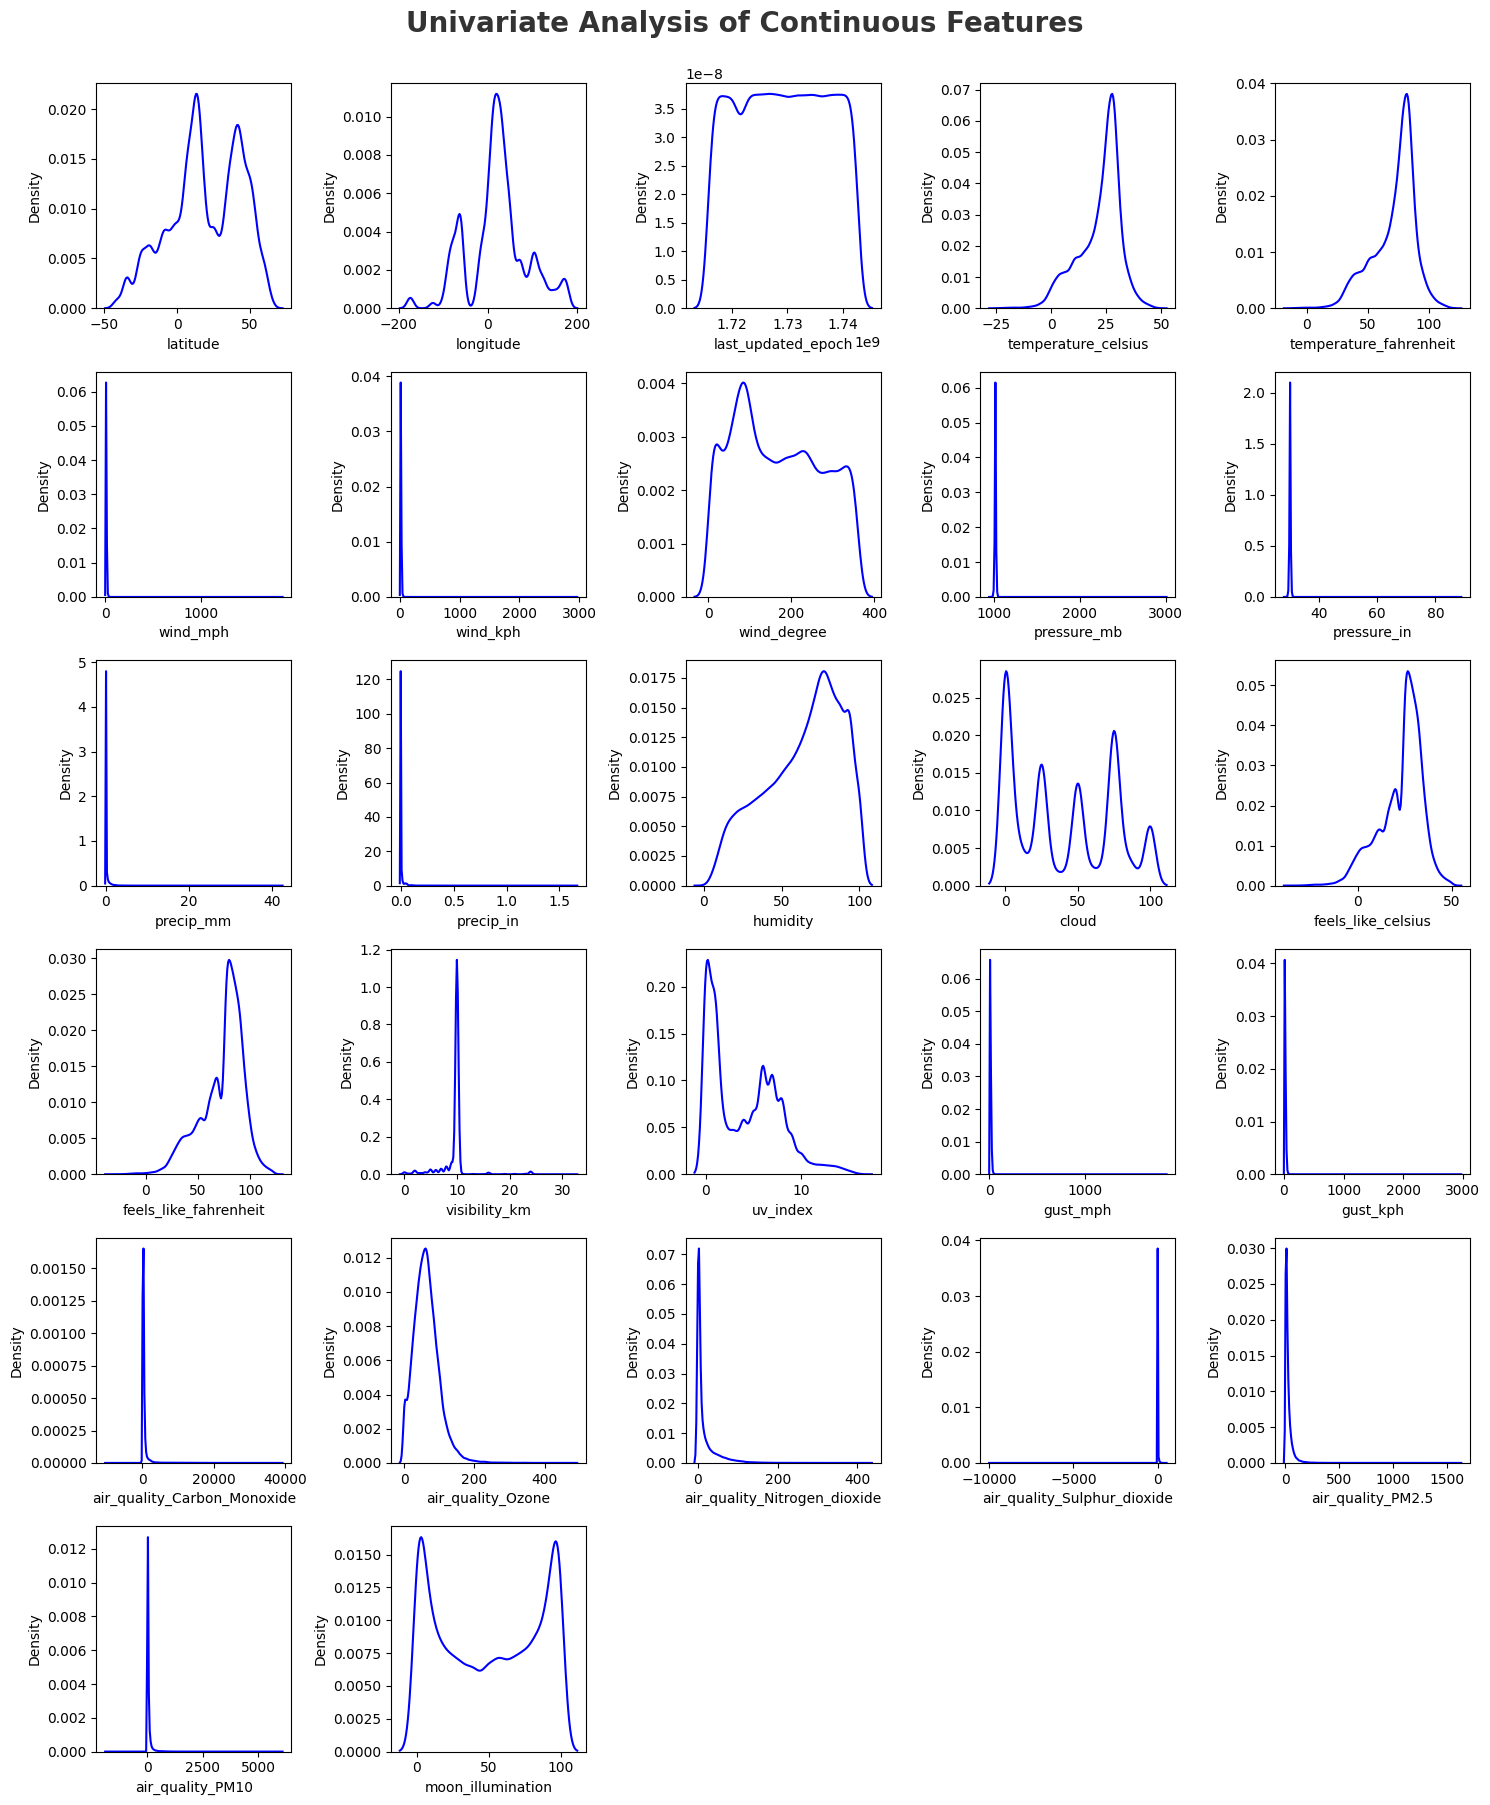

<IPython.core.display.Javascript object>

In [22]:
columns = 5  
rows = math.ceil(len(continuous_features) / columns)

plt.figure(figsize=(15, rows * 3))
plt.suptitle('Univariate Analysis of Continuous Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(continuous_features)):
    plt.subplot(rows, columns, i+1)
    sns.kdeplot(x=df[continuous_features[i]], color='blue') 
    plt.xlabel(continuous_features[i])

plt.tight_layout()
plt.show()


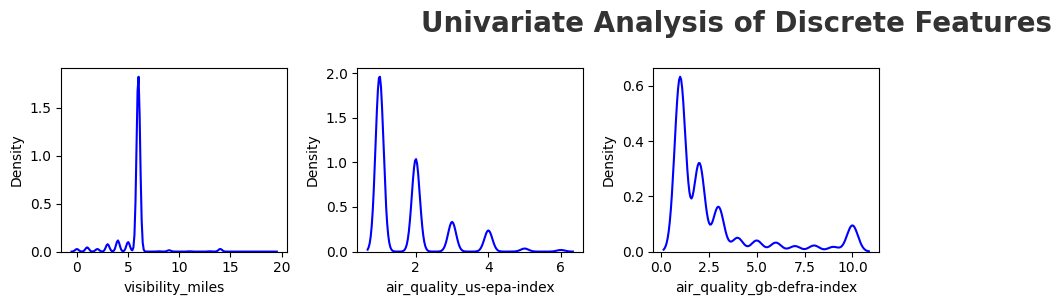

<IPython.core.display.Javascript object>

In [23]:
columns = 5  
rows = math.ceil(len(discrete_features) / columns)

plt.figure(figsize=(15, rows * 3))
plt.suptitle('Univariate Analysis of Discrete Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(discrete_features)):
    plt.subplot(rows, columns, i+1)
    sns.kdeplot(x=df[discrete_features[i]], color='blue') 
    plt.xlabel(discrete_features[i])

plt.tight_layout()
plt.show()

some of the feature has gaussian distribution but others doesnt have gaussian distribution this proves that these are skewed data.

In [60]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df,
    feature="country",
    xlabel="Percentage",
    ylabel="Country",
    perc=True,
)

<IPython.core.display.Javascript object>

In [64]:
df.head()

country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul  0.628537   0.714078      Asia/Kabul   
1      Albania            Tirana  0.906773  -0.035908   Europe/Tirane   
2      Algeria           Algiers  0.720057  -0.290715  Africa/Algiers   
3      Andorra  Andorra La Vella  0.954576  -0.313962  Europe/Andorra   
4       Angola            Luanda -1.143024  -0.136038   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0           -1.725311  2024-05-16 13:15             0.460935   
1           -1.725311  2024-05-16 10:45            -0.328191   
2           -1.725311  2024-05-16 09:45             0.087138   
3           -1.725311  2024-05-16 10:45            -1.646862   
4           -1.725311  2024-05-16 09:45             0.398636   

   temperature_fahrenheit condition_text  wind_mph  wind_kph  wind_degree  \
0                0.456232  Partly Cloudy  0.001759 -0.002387     1.629436   
1               -0.328287  Partly cloudy -0.150098 -0.143943     1.455781   
2                0.087047          Sunny  0.121075  0.118947     1.069882   
3               -1.649280  Light drizzle -0.095863 -0.096757     0.442795   
4                0.398547  Partly cloudy -0.019935 -0.022609    -0.184292   

  wind_direction  pressure_mb  pressure_in  precip_mm  precip_in  humidity  \
0            NNW    -0.160508    -0.144869  -0.231128  -0.222381 -1.623920   
1             NW    -0.160508    -0.169891  -0.066501  -0.222381  1.242267   
2              W    -0.234395    -0.244958  -0.231128  -0.222381 -1.419193   
3             SW    -0.529946    -0.495181   0.262754   0.194288 -0.108936   
4            SSE    -0.234395    -0.244958  -0.231128  -0.222381  1.037539   

      cloud  feels_like_celsius  feels_like_fahrenheit  visibility_km  \
0 -0.297327            0.194291               0.192674       0.162407   
1  1.028979           -0.355472              -0.355209       0.162407   
2 -1.181530            0.133207               0.139340       0.162407   
3  1.765815           -1.681885              -1.678857      -2.994176   
4  0.292142            0.490989               0.488434       0.162407   

   visibility_miles  uv_index  gust_mph  gust_kph  \
0          0.205924  0.823803 -0.228985 -0.228421   
1          0.205924  0.267752 -0.045734 -0.042643   
2          0.205924  0.267752  0.195385  0.191078   
3         -2.963408 -0.566325 -0.325433 -0.324307   
4          0.205924  1.101829  0.060358  0.065228   

   air_quality_Carbon_Monoxide  air_quality_Ozone  \
0                    -0.267271           1.090828   
1                    -0.355864           0.933273   
2                     0.012847          -1.418996   
3                    -0.380721           0.023876   
4                     2.587020          -1.231036   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                     -0.531346                    -0.230485   
1                     -0.538927                    -0.232542   
2                      1.894413                     0.041065   
3                     -0.512395                    -0.230485   
4                      2.182472                     0.413417   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0          -0.383716         -0.156279                 -0.732893   
1          -0.547501         -0.312157                 -0.732893   
2          -0.338844         -0.208238                 -0.732893   
3          -0.556475         -0.319128                 -0.732893   
4           3.542624          1.337243                  3.297550   

   air_quality_gb-defra-index   sunrise    sunset  moonrise   moonset  \
0                   -0.658703  04:50 AM  06:50 PM  12:12 PM  01:11 AM   
1                   -0.658703  05:21 AM  07:54 PM  12:58 PM  02:14 AM   
2                   -0.658703  05:40 AM  07:50 PM  01:15 PM  02:14 AM   
3                   -0.658703  06:31 AM  09:11 PM  02:12 PM  03:31 AM   
4              

<IPython.core.display.Javascript object>

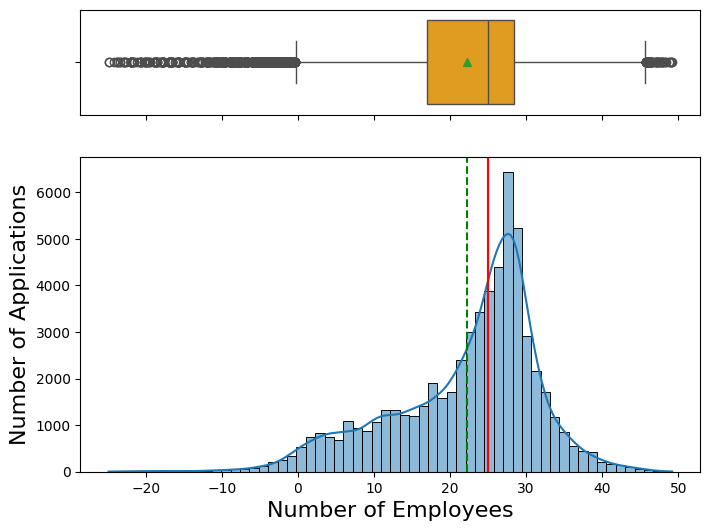

<IPython.core.display.Javascript object>

In [67]:

histogram_boxplot(
    data=df_0,
    feature="temperature_celsius",
    xlabel="Number of Employees",
    ylabel="Number of Applications",
    kde=True,
    bins=60,
)

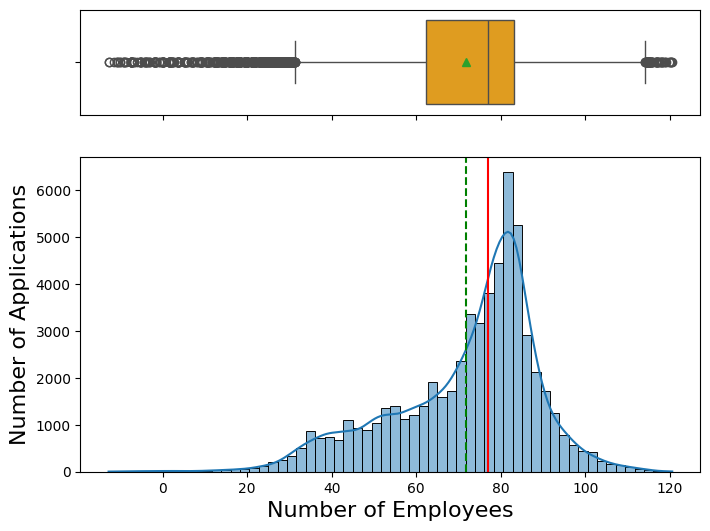

<IPython.core.display.Javascript object>

In [63]:

histogram_boxplot(
    data=df_0,
    feature="temperature_fahrenheit",
    xlabel="Number of Employees",
    ylabel="Number of Applications",
    kde=True,
    bins=60,
)

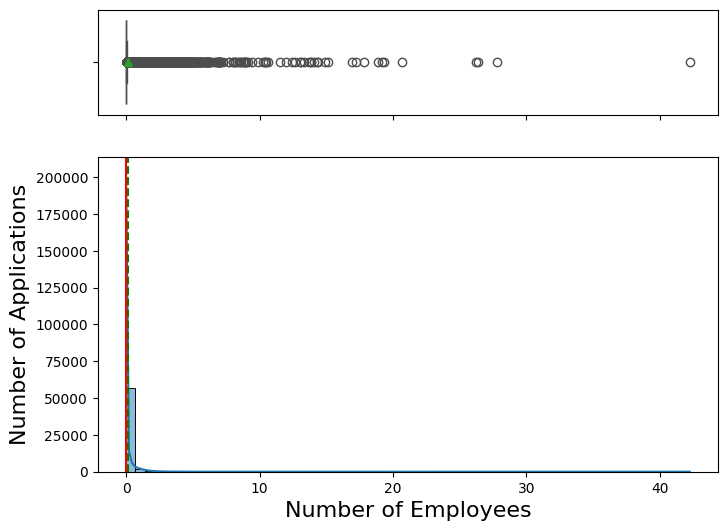

<IPython.core.display.Javascript object>

In [65]:
# Use user-defined function histogram_boxplot() to examine distribution of data
histogram_boxplot(
    data=df_0,
    feature="precip_mm",
    xlabel="Number of Employees",
    ylabel="Number of Applications",
    kde=True,
    bins=60,
    
)

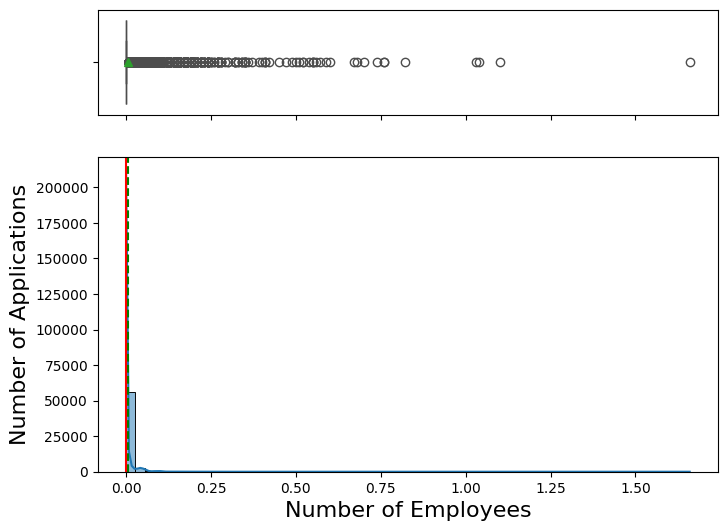

<IPython.core.display.Javascript object>

In [66]:
# Use user-defined function histogram_boxplot() to examine distribution of data
histogram_boxplot(
    data=df_0,
    feature="precip_in",
    xlabel="Number of Employees",
    ylabel="Number of Applications",
    kde=True,
    bins=60,
)

## Checking for Outliers

### Using Boxplot

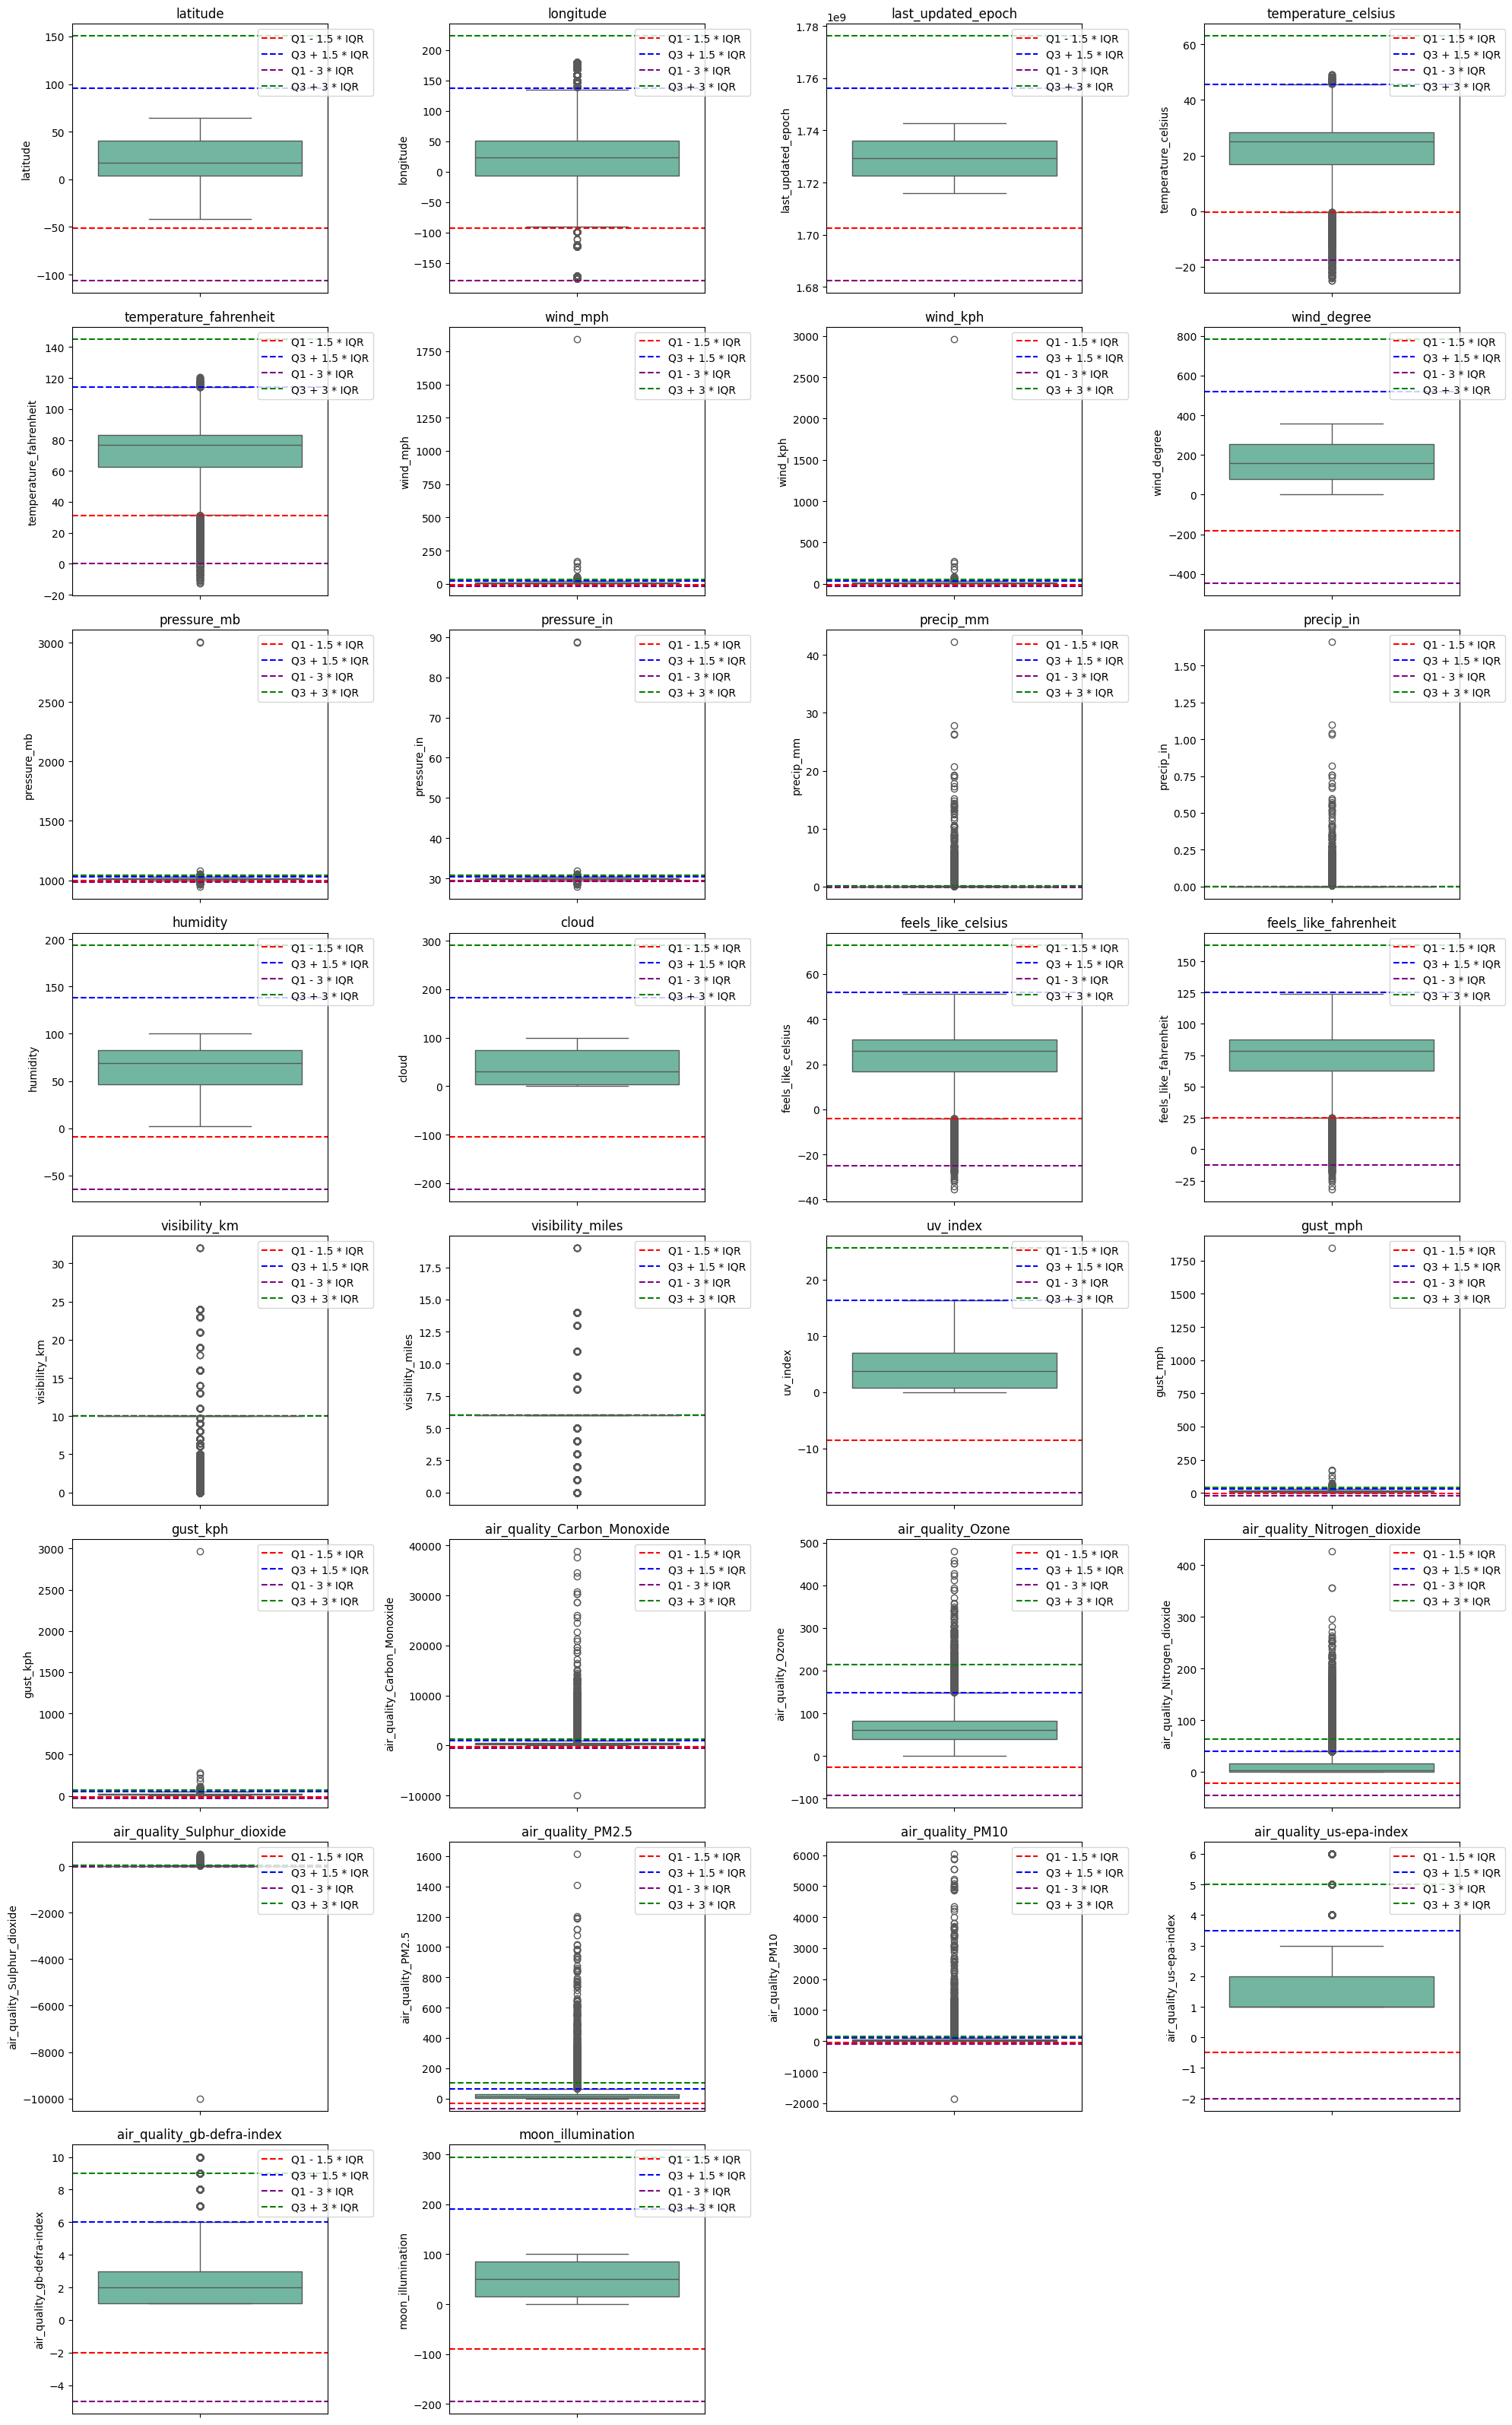

<IPython.core.display.Javascript object>

In [26]:
# Calculate IQR and identify outliers, extreme outliers
outliers = {}
extreme_outliers = {}
outliers_mask = pd.Series(False, index=df.index) 
extreme_outliers_mask = pd.Series(False, index=df.index)

# Set up the matplotlib figure
num_cols = 4
num_rows = (len(numerical_features) + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 4))

# Create boxplots
for i, column in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[column], palette='Set2')

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    extreme_lower_bound = Q1 - 3 * IQR
    extreme_upper_bound = Q3 + 3 * IQR

 # Identify outliers, extreme outliers
    
    outliers[column] = (df[column] < lower_bound) | (df[column] > upper_bound)
    extreme_outliers[column] = (df[column] < extreme_lower_bound) | (df[column] > extreme_upper_bound)

    outliers_mask |= (df[column] < lower_bound) | (df[column] > upper_bound)
    extreme_outliers_mask |= (df[column] < extreme_lower_bound) | (df[column] > extreme_upper_bound)


 # Add lines for lower and upper bounds to detect the outliers
    plt.axhline(y=lower_bound, color='red', linestyle='--', label='Q1 - 1.5 * IQR')
    plt.axhline(y=upper_bound, color='blue', linestyle='--', label='Q3 + 1.5 * IQR')
    plt.axhline(y=extreme_lower_bound, color='purple', linestyle='--', label='Q1 - 3 * IQR')
    plt.axhline(y=extreme_upper_bound, color='green', linestyle='--', label='Q3 + 3 * IQR')
    
    plt.title(column)
    plt.xlabel('')



  # Add the legend outside the boxplot area
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()

df['outliers'] = outliers_mask
df['extreme_outliers'] = extreme_outliers_mask
    
    

In [27]:
print(f'Size of dataset: {df.shape[0]}')

df_outliers = df[df['outliers'] == True]
print(f'Number of outliers: {df_outliers.shape[0]}')

df_extreme_outliers = df[df['extreme_outliers'] == True]
print(f'Number of extreme outliers: {df_extreme_outliers.shape[0]}')

df_without_outliers = df[df['outliers'] == False]
print(f'Shape of df without outliers: {df_without_outliers.shape}')

df_without_extreme_outliers = df[df['extreme_outliers'] == False]
print(f'Shape of df without extreme outliers: {df_without_extreme_outliers.shape}')

Size of dataset: 60218
Number of outliers: 34793
Number of extreme outliers: 24751
Shape of df without outliers: (25425, 43)
Shape of df without extreme outliers: (35467, 43)


<IPython.core.display.Javascript object>

## Multivariate Analysis

### Checking Correlation Between Numerical Features

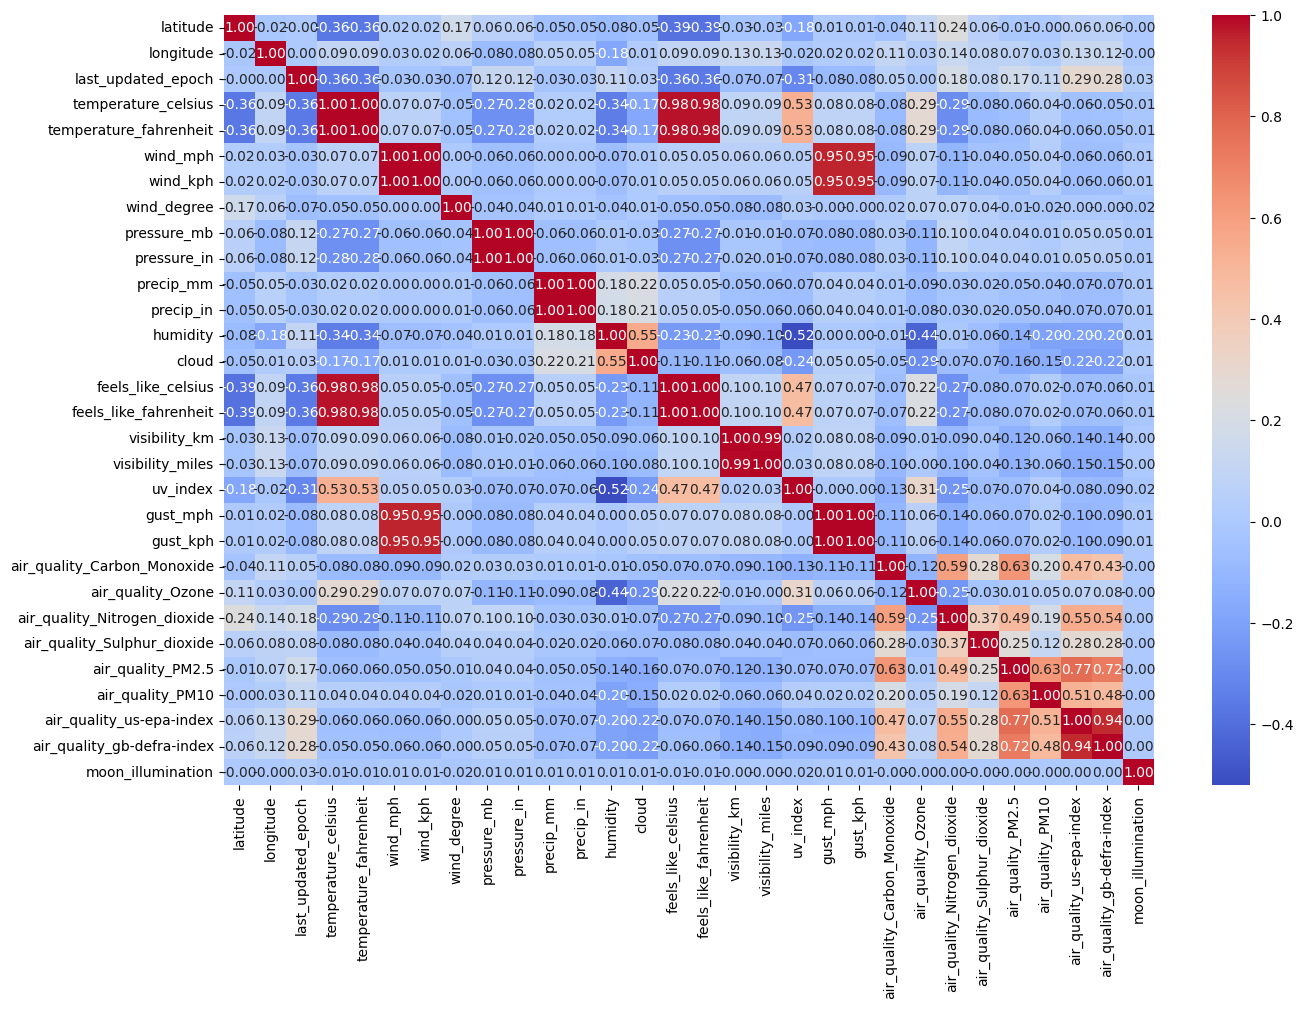

<IPython.core.display.Javascript object>

In [28]:
corr = df[numerical_features].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

## Check for Multicollinearity 

In [29]:
df[numerical_features].corr()

latitude  longitude  last_updated_epoch  \
latitude                      1.000000  -0.020461           -0.000437   
longitude                    -0.020461   1.000000            0.002387   
last_updated_epoch           -0.000437   0.002387            1.000000   
temperature_celsius          -0.363011   0.093646           -0.355324   
temperature_fahrenheit       -0.362998   0.093632           -0.355313   
wind_mph                      0.021038   0.025068           -0.031404   
wind_kph                      0.021068   0.024995           -0.031421   
wind_degree                   0.166111   0.064829           -0.066094   
pressure_mb                   0.056408  -0.076096            0.119658   
pressure_in                   0.056581  -0.075050            0.119790   
precip_mm                    -0.054329   0.054751           -0.029568   
precip_in                    -0.052968   0.054782           -0.029454   
humidity                     -0.077551  -0.178600            0.108634   
cloud                        -0.051348   0.014491            0.034319   
feels_like_celsius           -0.386966   0.093751           -0.355885   
feels_like_fahrenheit        -0.386959   0.093753           -0.355896   
visibility_km                -0.030063   0.128637           -0.066806   
visibility_miles             -0.031942   0.127505           -0.072440   
uv_index                     -0.177738  -0.021150           -0.311394   
gust_mph                      0.006259   0.020087           -0.081217   
gust_kph                      0.006282   0.020074           -0.081268   
air_quality_Carbon_Monoxide  -0.036036   0.107123            0.054472   
air_quality_Ozone             0.105457   0.032613            0.002716   
air_quality_Nitrogen_dioxide  0.243817   0.138373            0.182370   
air_quality_Sulphur_dioxide   0.056224   0.077979            0.083117   
air_quality_PM2.5            -0.007841   0.072653            0.166401   
air_quality_PM10             -0.001032   0.030410            0.112472   
air_quality_us-epa-index      0.061076   0.126449            0.293054   
air_quality_gb-defra-index    0.062703   0.123087            0.284346   
moon_illumination            -0.000334  -0.000749            0.028868   

                              temperature_celsius  temperature_fahrenheit  \
latitude                                -0.363011               -0.362998   
longitude                                0.093646                0.093632   
last_updated_epoch                      -0.355324               -0.355313   
temperature_celsius                      1.000000                0.999997   
temperature_fahrenheit                   0.999997                1.000000   
wind_mph                                 0.065701                0.065717   
wind_kph                                 0.065627                0.065643   
wind_degree                             -0.047675               -0.047660   
pressure_mb                             -0.274704               -0.274698   
pressure_in                             -0.275302               -0.275296   
precip_mm                                0.020922                0.020933   
precip_in                                0.020973                0.020983   
humidity                                -0.342968               -0.342968   
cloud                                   -0.172178               -0.172169   
feels_like_celsius                       0.981141                0.981141   
feels_like_fahrenheit                    0.981136                0.981137   
visibility_km                            0.087680                0.087684   
visibility_miles                         0.091613                0.091614   
uv_index                                 0.528993                0.528996   
gust_mph                                 0.080460                0.080472   
gust_kph                                 0.080479                0.080492   
air_quality_Carbon_Monoxide             -0.082827               -0.08282

<IPython.core.display.Javascript object>

### Data Cleaning & Preprocessing

Handle missing values, outliers, and normalize data.


### Handling missing values

For Numerical

In [30]:
#replacing the numerical missing values
#so whenver there is outliers you should replace the missing values with median or mode

for feature in num_with_nan:
    #we will replace by using median since there are outliers
    median_value = df[feature].median()
    
    #create a new feature to capture nan values
    
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)
    
df[num_with_nan].isnull().sum()

Series([], dtype: float64)

<IPython.core.display.Javascript object>

For categorical

In [31]:
#replace missing values with a new label

def replace_cat_feature(dataset,features_nan):
    data = dataset.copy()
    data[features_nan] = data[features_nan].fillna('Missing')
    return data

dataset = replace_cat_feature(df,cat_features_nan)
dataset[cat_features_nan].isnull().sum()

Series([], dtype: float64)

<IPython.core.display.Javascript object>

## Handling Duplicate Data

Removing Duplicates

In [32]:
df = df.drop_duplicates()

<IPython.core.display.Javascript object>

## Handling Outliers

Boxplot after removing outliers

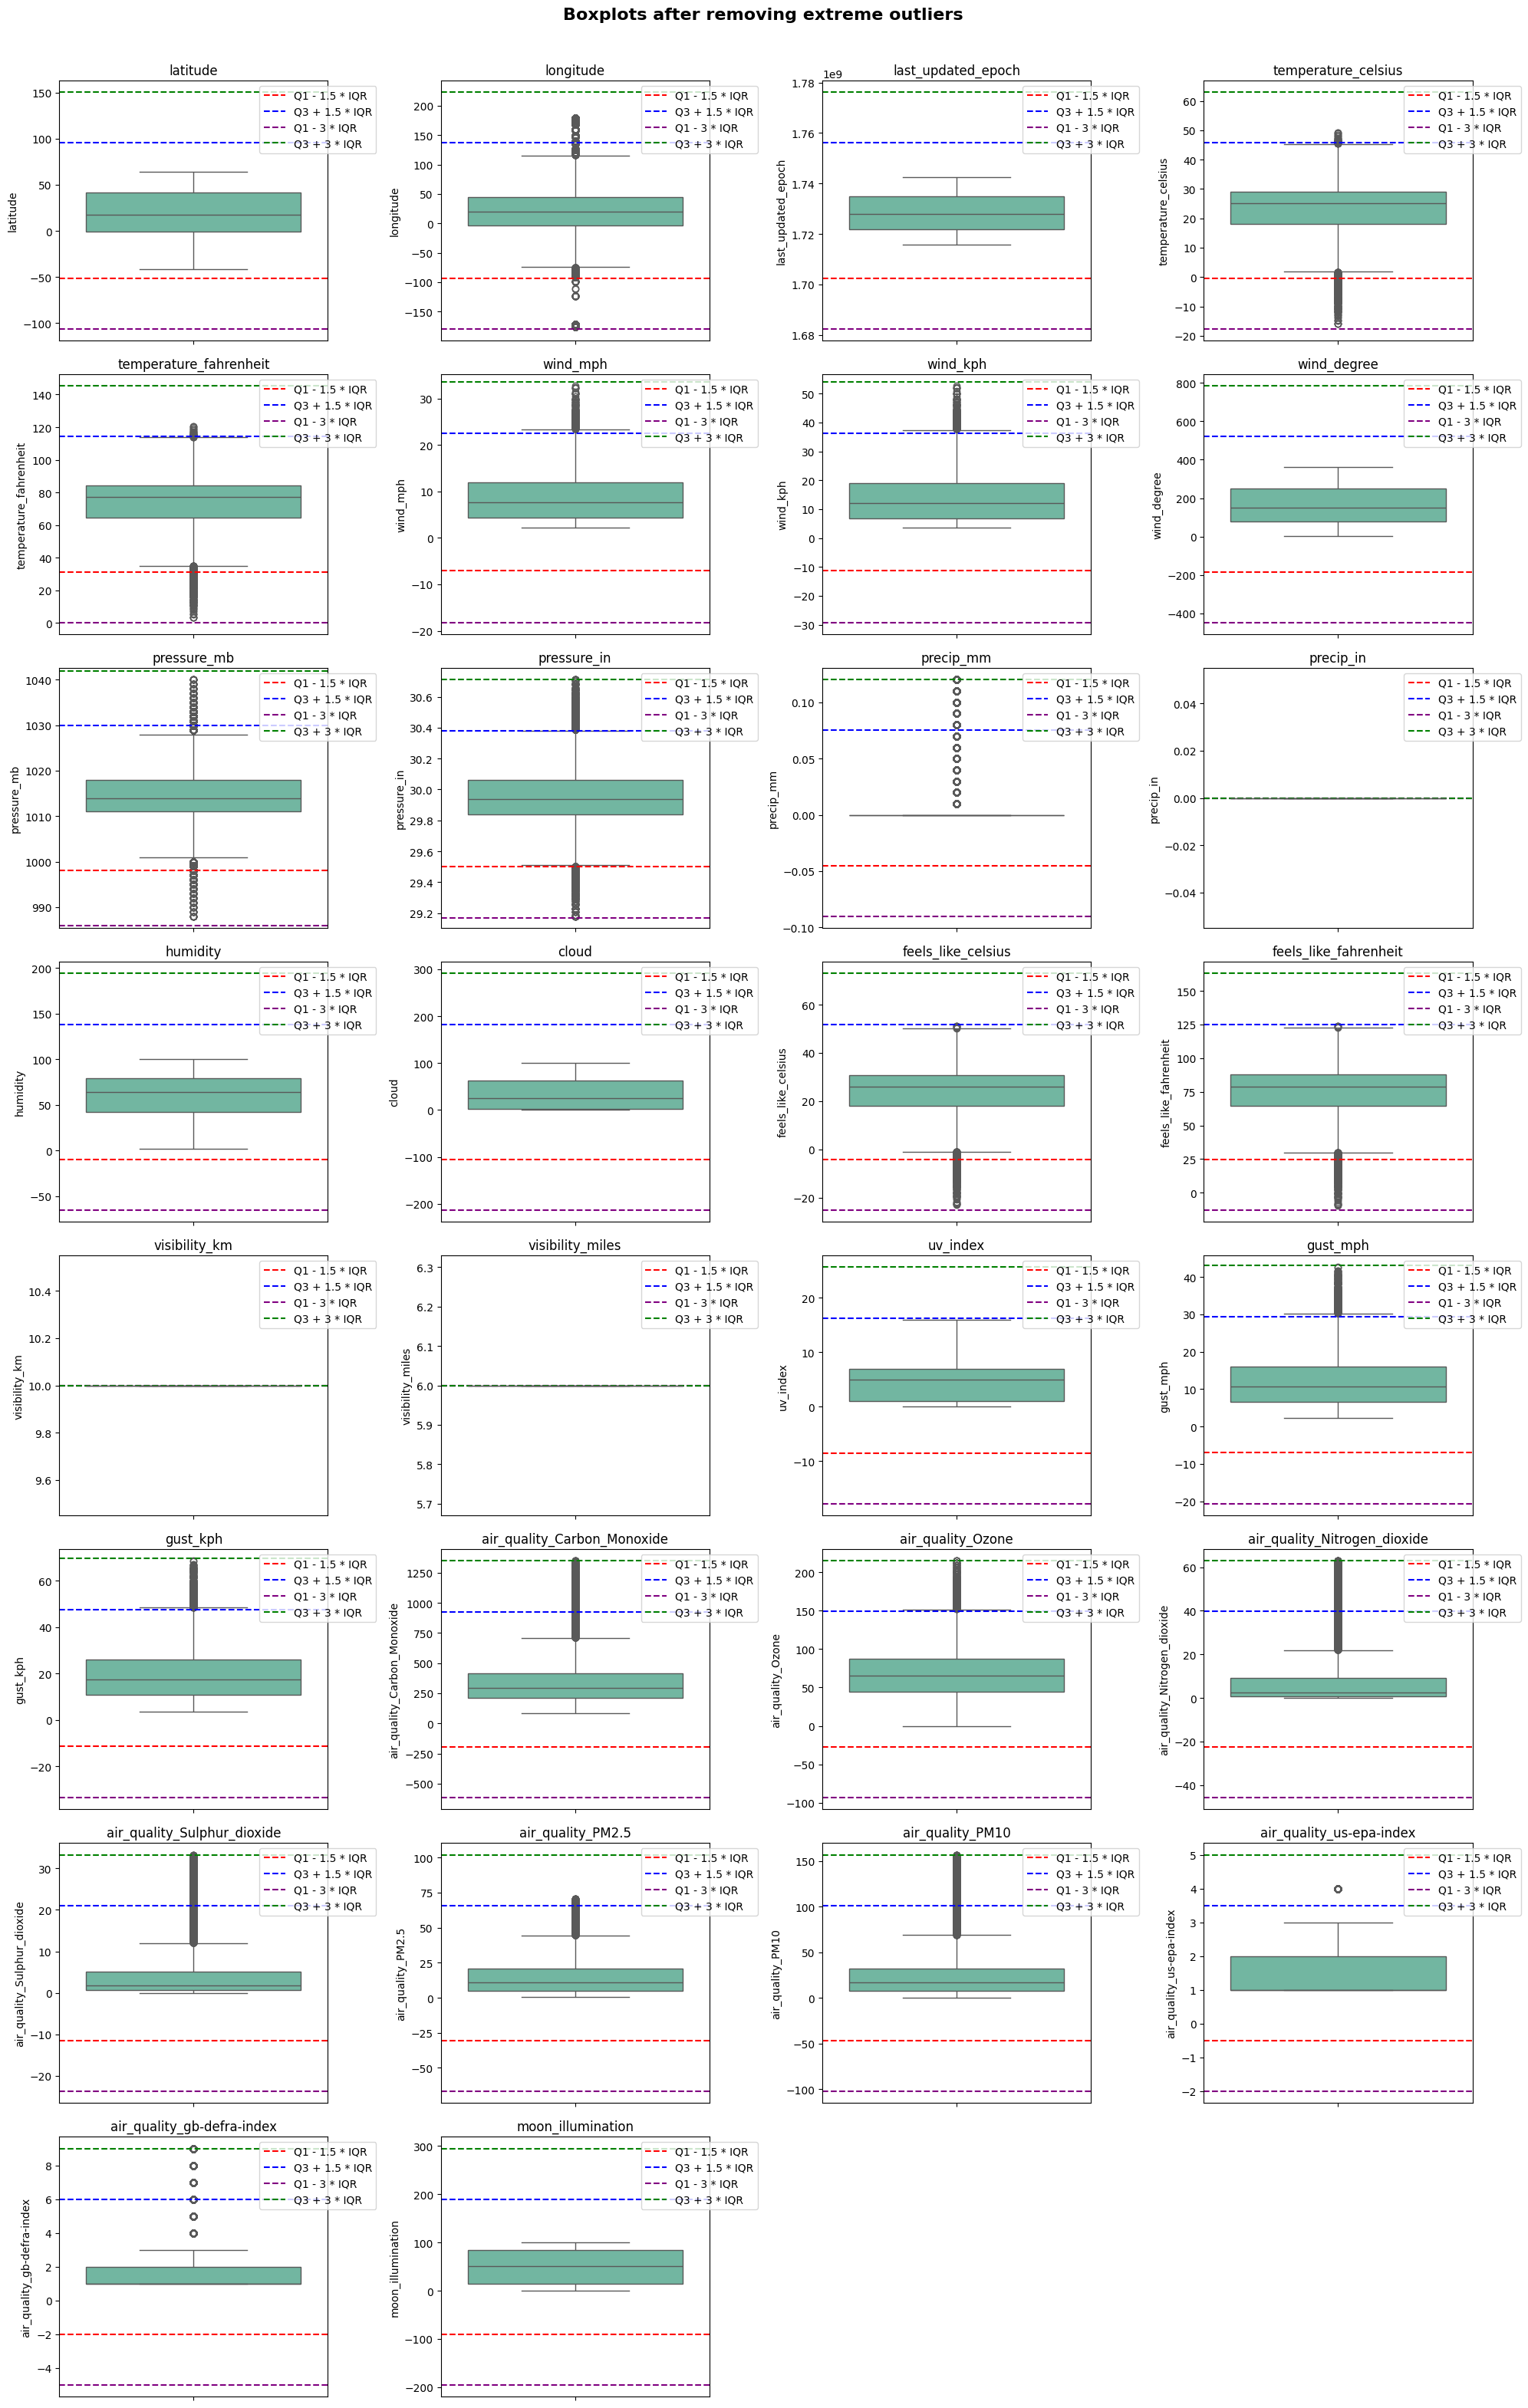

<IPython.core.display.Javascript object>

In [33]:
# Set up the matplotlib figure
num_cols = 4
num_rows = (len(numerical_features) + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 4))
plt.suptitle('Boxplots after removing extreme outliers', fontsize=16, fontweight='bold')

# Create boxplots
for i, column in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df_without_extreme_outliers[column], palette='Set2')

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    extreme_lower_bound = Q1 - 3 * IQR
    extreme_upper_bound = Q3 + 3 * IQR
    
    # Add lines for lower and upper bounds to detect the outliers
    plt.axhline(y=lower_bound, color='red', linestyle='--', label='Q1 - 1.5 * IQR')
    plt.axhline(y=upper_bound, color='blue', linestyle='--', label='Q3 + 1.5 * IQR')
    plt.axhline(y=extreme_lower_bound, color='purple', linestyle='--', label='Q1 - 3 * IQR')
    plt.axhline(y=extreme_upper_bound, color='green', linestyle='--', label='Q3 + 3 * IQR')
    
    plt.title(column)
    plt.xlabel('')
    
    # Add the legend outside the boxplot area
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
    
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Normalizing data.


#### Encoding (For Categorical Data)  and Standardization (For Numerical Data)

In [59]:
# Create Column Transformer 

from sklearn.preprocessing import  StandardScaler


# Choose a scaling method
scaler = StandardScaler() 

# Apply normalization
df[numerical_features] = scaler.fit_transform(df[numerical_features])

<IPython.core.display.Javascript object>

In [37]:
df_without_extreme_outliers.select_dtypes(include=['number']).columns


Index(['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius',
       'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'wind_degree',
       'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km',
       'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'moon_illumination'],
      dtype='object')

<IPython.core.display.Javascript object>

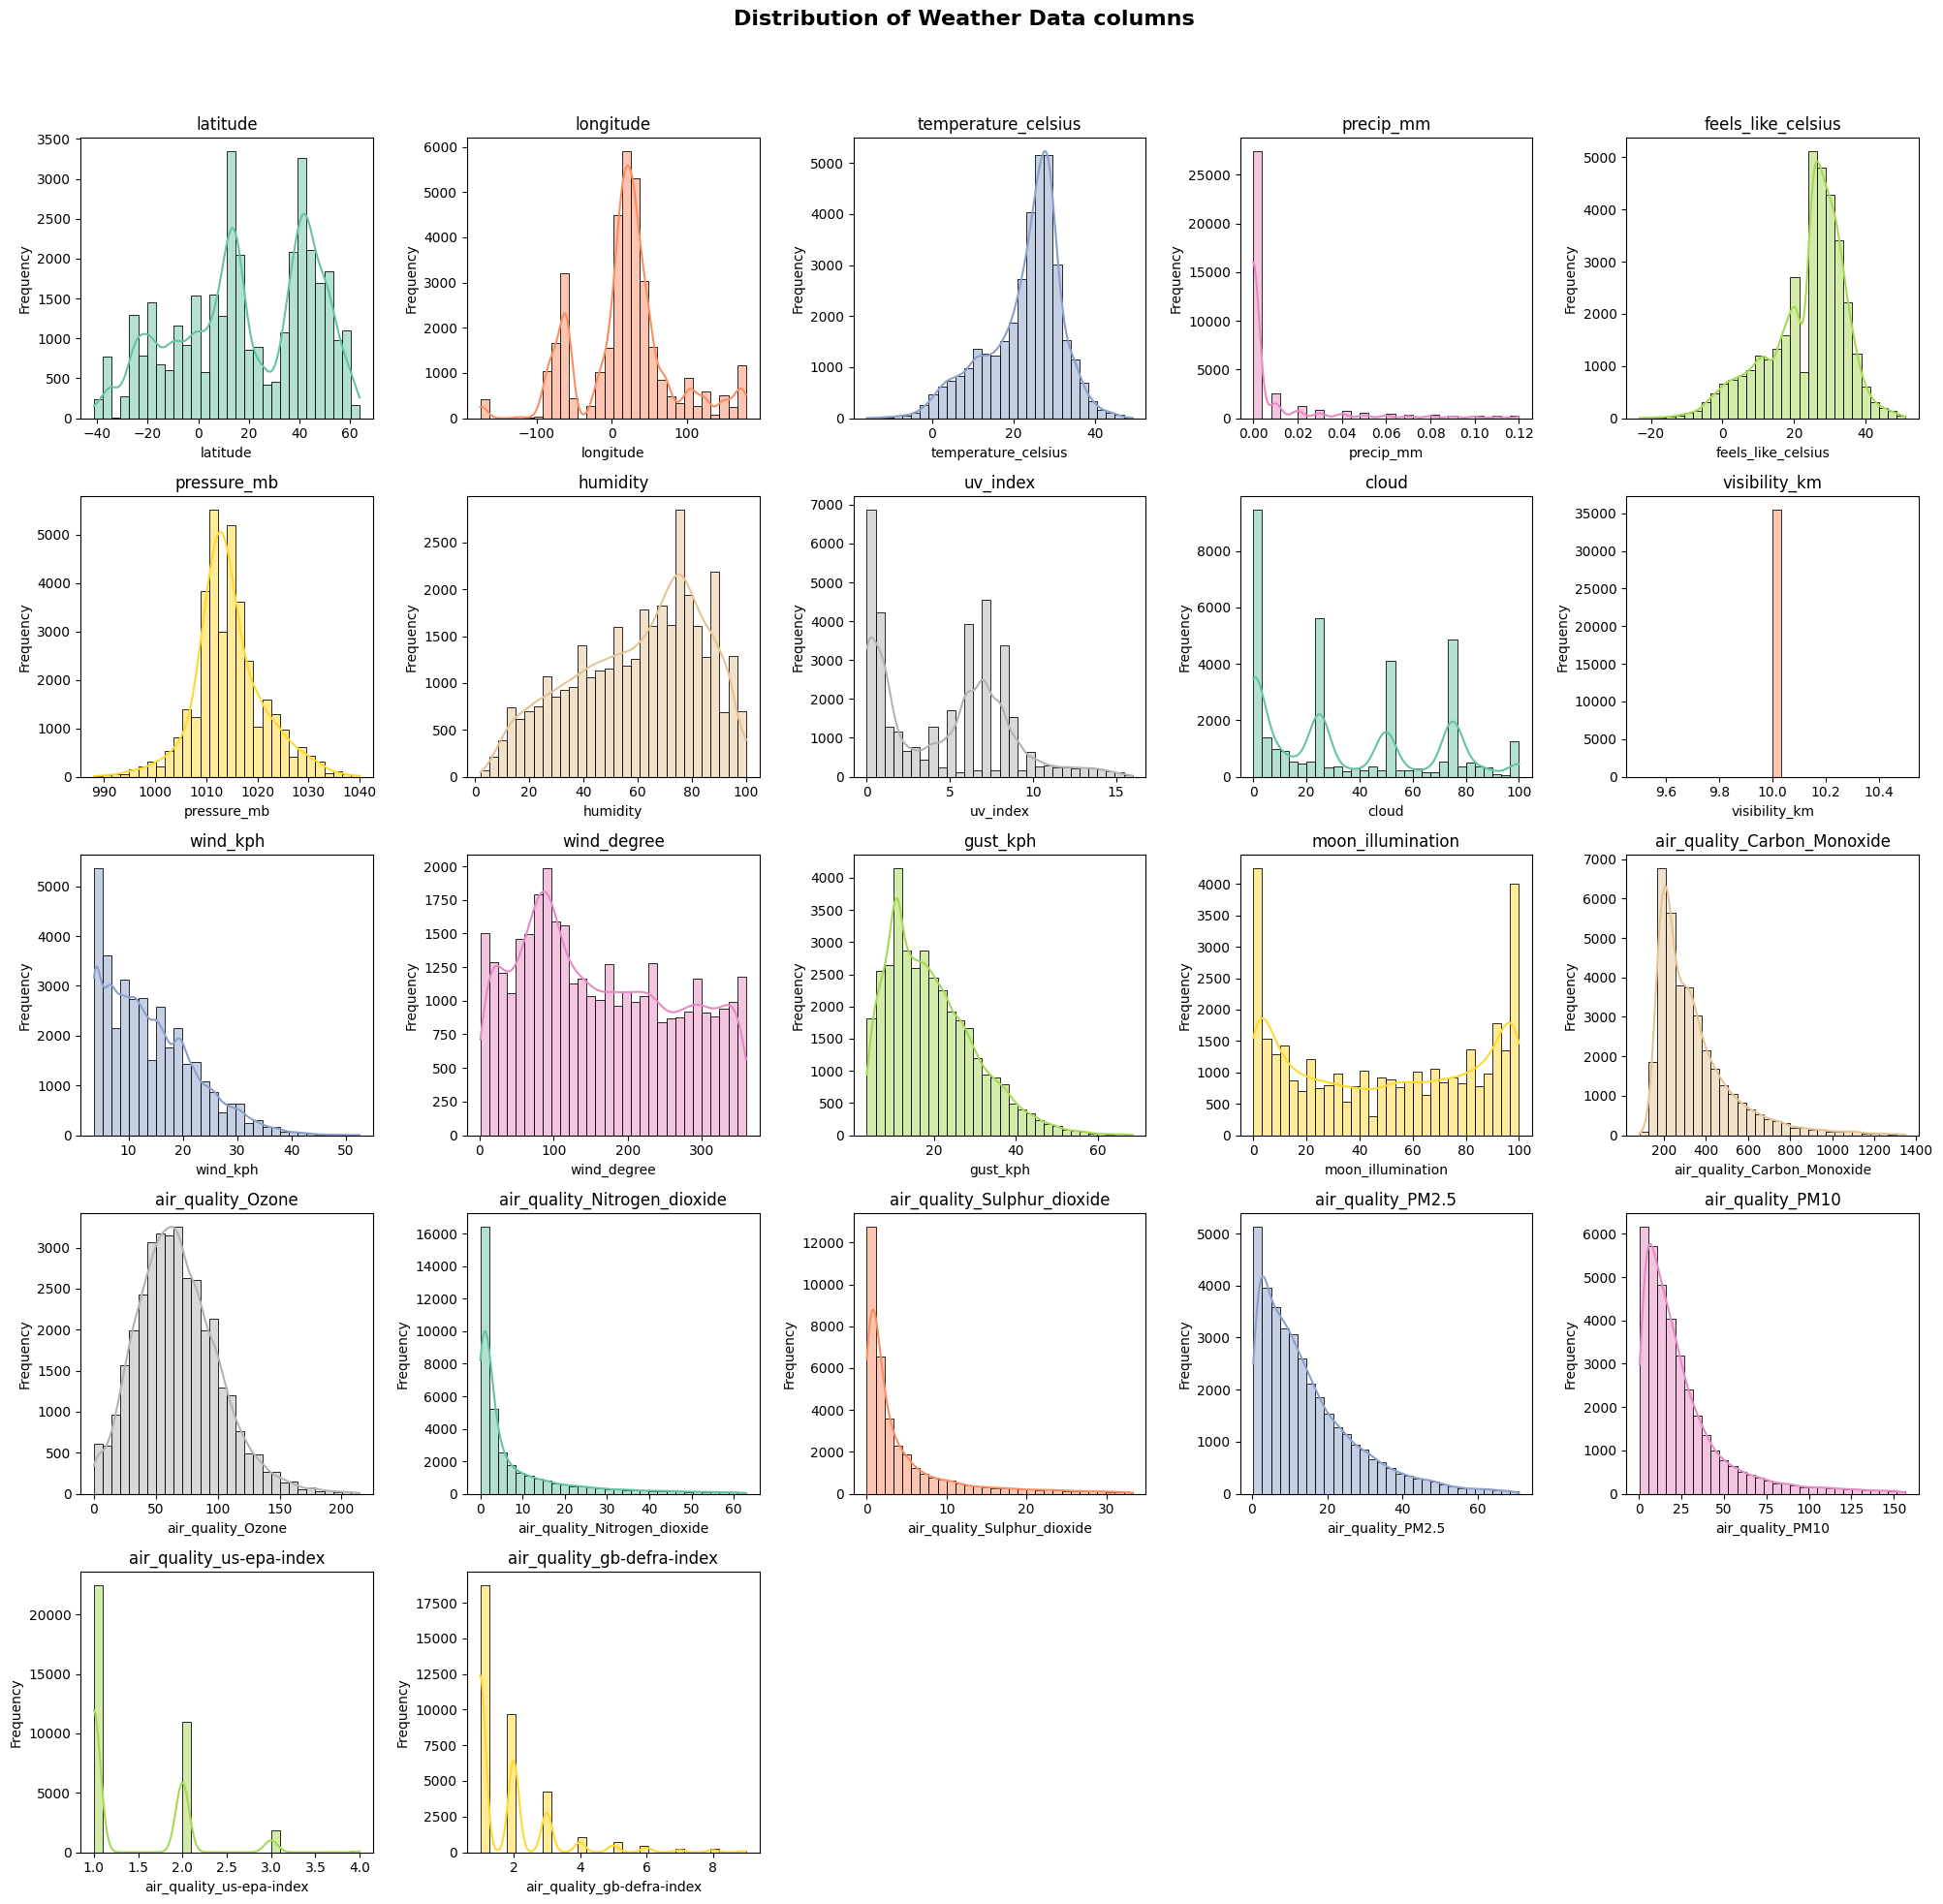

<IPython.core.display.Javascript object>

In [54]:
# selected_columns = df_without_extreme_outliers.select_dtypes(include=['number']).columns

# Specify the columns to visualize
selected_columns = ['latitude', 'longitude', 'temperature_celsius', 'precip_mm', 'feels_like_celsius',
    'pressure_mb', 'humidity', 'uv_index', 'cloud', 'visibility_km',
    'wind_kph', 'wind_degree', 'gust_kph', 'moon_illumination',
    
    'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
    'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
    'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
    'air_quality_gb-defra-index',]

# Create a figure for the subplots
n_cols = 5
n_rows = (len(selected_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy indexing

# Get the SET2 color palette
set2_palette = sns.color_palette("Set2", n_colors=len(selected_columns))

# Loop through the selected columns and create plots
for i, col in enumerate(selected_columns):
    sns.histplot(df_without_extreme_outliers[col], ax=axes[i], bins=30, kde=True, color=set2_palette[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add the title 
plt.suptitle('Distribution of Weather Data columns', fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

## Visualizations for temperature and precipitation

In [58]:
import plotly.express as px
fig = px.scatter(
    df_without_extreme_outliers,
    x="temperature_celsius",
    y="precip_mm",
    color="humidity", 
    color_continuous_scale = "tempo",
    size='wind_kph', # Size of data points based on wind kph in mm
    hover_name='country',
    hover_data=['location_name'],  # Additional data to show on hover (location_name)
    labels=
        {
            'temperature_celsius': 'Temperature (°C)',
            'precip_mm': 'Precipitation (mm)',
            'wind_kph' : 'Wind (kph)',
            'humidity' : "Humidity (%)",
            'country': 'Country',
            'condition_text': 'Weather Condition',
            'location_name': 'City'
        },
    title="Temperature and Precipitation with Wind Speed and Humidity",
    height=600,
    )

fig.update_xaxes(title="Temperature (°C)")
fig.update_yaxes(title="Precipitation (mm)")

fig.show()

<IPython.core.display.Javascript object>

## Model Building: MA, EMA

- Build a basic forecasting model and evaluate its performance using different metrics.
- Use lastupdated feature for the time series analysis.


## MA

MA - MAE: 3.75
MA - RMSE: 4.85


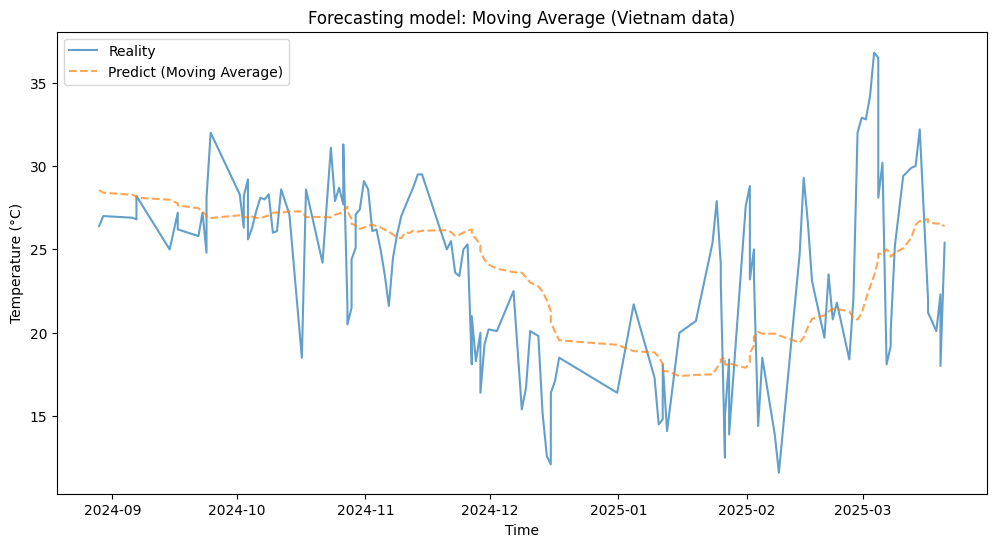

<IPython.core.display.Javascript object>

In [56]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# 1. Get data, Change time and sort values
new_df = df_without_extreme_outliers[df_without_extreme_outliers['country'] == "Vietnam"].copy()
new_df['last_updated'] = pd.to_datetime(new_df['last_updated'])
new_df = new_df.sort_values(by='last_updated')

# 2. Apply MA
window_size = 24
new_df['moving_avg'] = new_df['temperature_celsius'].rolling(window=window_size).mean()

# 3. Predict
new_df['forecast'] = new_df['moving_avg'].shift(1)

# 4. Evaluate
new_df.dropna(inplace=True)  
mae = mean_absolute_error(new_df['temperature_celsius'], new_df['forecast'])
rmse = np.sqrt(mean_squared_error(new_df['temperature_celsius'], new_df['forecast']))

print(f"MA - MAE: {mae:.2f}")
print(f"MA - RMSE: {rmse:.2f}")

# 5. Reality vs Predict
plt.figure(figsize=(12, 6))
plt.plot(new_df['last_updated'], new_df['temperature_celsius'], label="Reality", alpha=0.7)
plt.plot(new_df['last_updated'], new_df['forecast'], label="Predict (Moving Average)", linestyle="dashed", alpha=0.7)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Forecasting model: Moving Average (Vietnam data)")
plt.show()

## EMA

EMA - MAE: 3.56
EMA - RMSE: 4.61


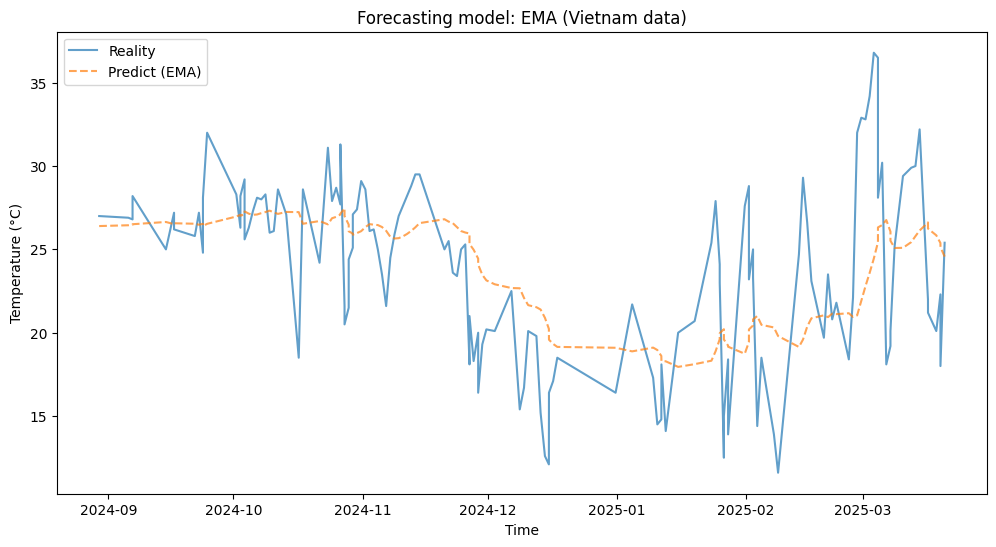

<IPython.core.display.Javascript object>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Apply EMA
span = 24 
new_df['ema'] = new_df['temperature_celsius'].ewm(span=span, adjust=False).mean()

# 2. Predict
new_df['forecast_ema'] = new_df['ema'].shift(1)

# 3. Evaluate
new_df.dropna(inplace=True) 
mae_ema = mean_absolute_error(new_df['temperature_celsius'], new_df['forecast_ema'])
rmse_ema = np.sqrt(mean_squared_error(new_df['temperature_celsius'], new_df['forecast_ema']))

print(f"EMA - MAE: {mae_ema:.2f}")
print(f"EMA - RMSE: {rmse_ema:.2f}")

# 4. Reality vs Predict
plt.figure(figsize=(12, 6))
plt.plot(new_df['last_updated'], new_df['temperature_celsius'], label="Reality", alpha=0.7)
plt.plot(new_df['last_updated'], new_df['forecast_ema'], label="Predict (EMA)", linestyle="dashed", alpha=0.7)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Forecasting model: EMA (Vietnam data)")
plt.show()